[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


R Square Error for unprocessed Validation without NLP = 1.0
R Square Error for processed Validation without NLP = 0.9999164550768478

R Square Error for unprocessed Testing without NLP = 1.0
R Square Error for processed Testing without NLP = 0.9999164550768478

The Mean Squared Error for Unprocessed Validation data NLP = 1.3648134536744663e-26
The Mean Squared Error for Processed Validation data NLP = 2.9708574672945817e-05

The Mean Squared Error for Unprocessed Testing data NLP = 1.3648134536744663e-26
The Mean Squared Error for Processed Testing data NLP = 2.9708574672945817e-05

R Square Error for unprocessed Validation without NLP = 0.3374368367106745
R Square Error for processed Validation without NLP = 0.33782421100479465

R Square Error for unprocessed Testing without NLP = 0.3374368367106745
R Square Error for processed Testing without NLP = 0.33782421100479465

The Mean Squared Error for Unprocessed Validation data NLP = 0.23560746086568418
The Mean Squared Error for Processe

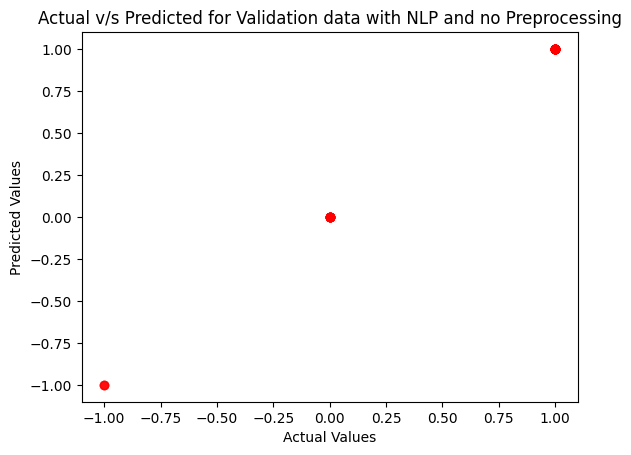

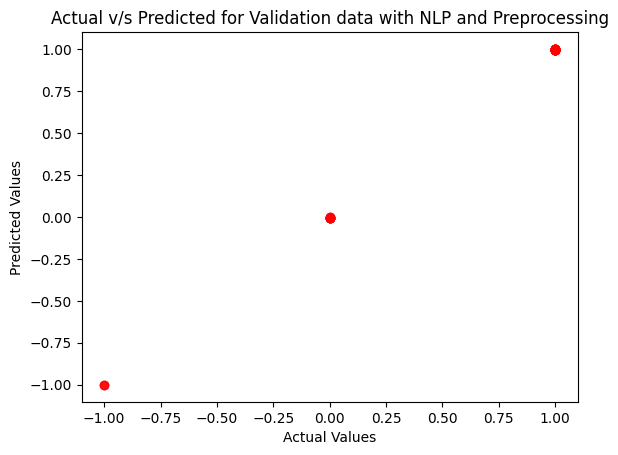

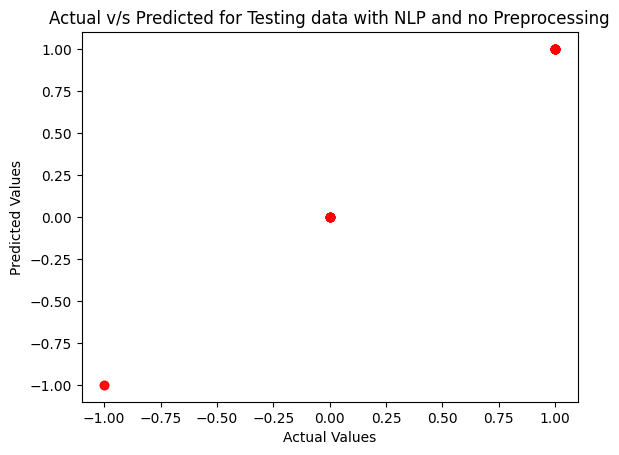

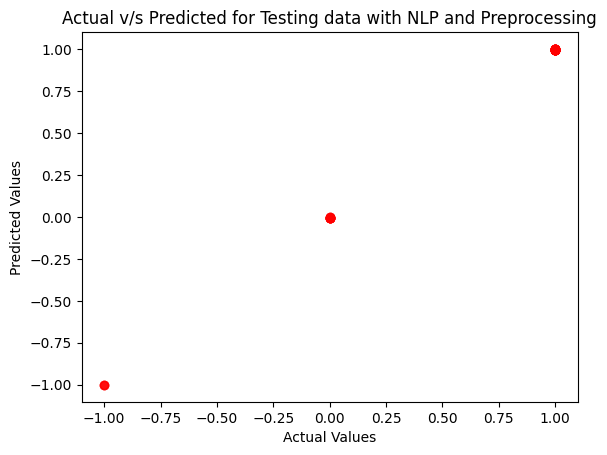

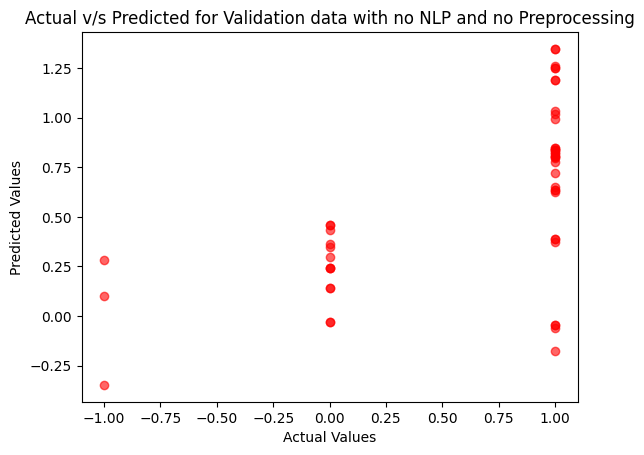

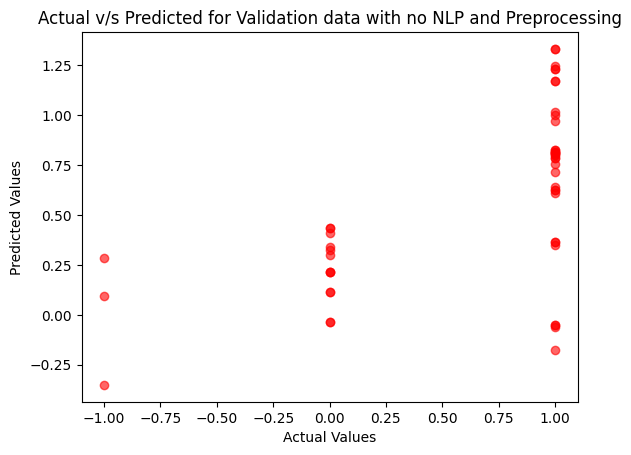

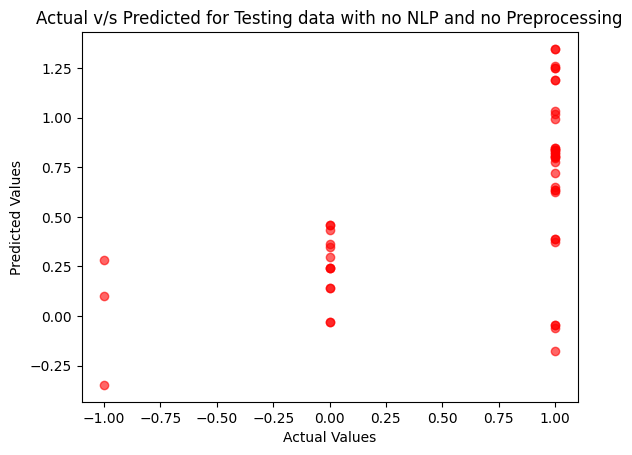

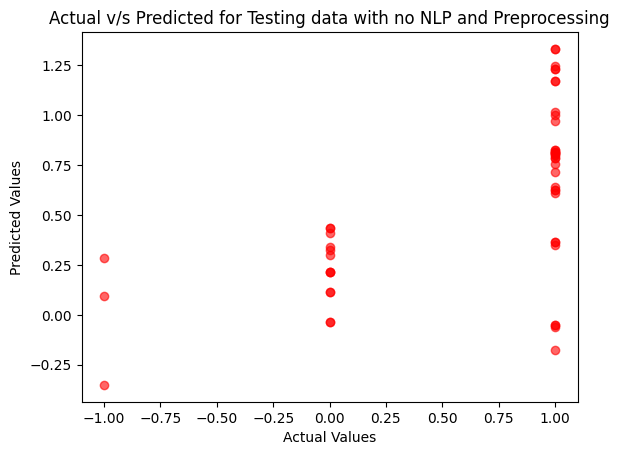

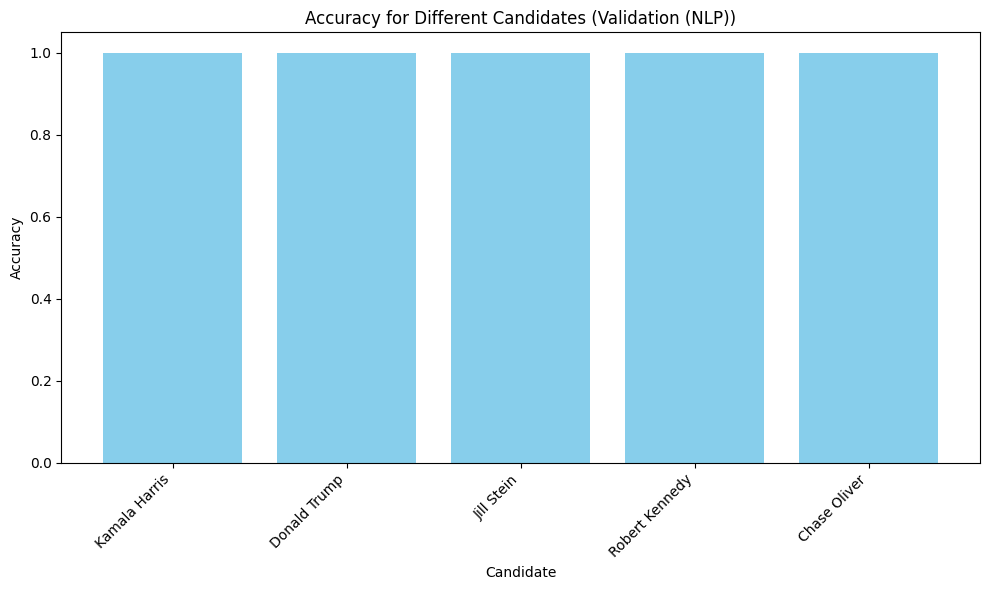

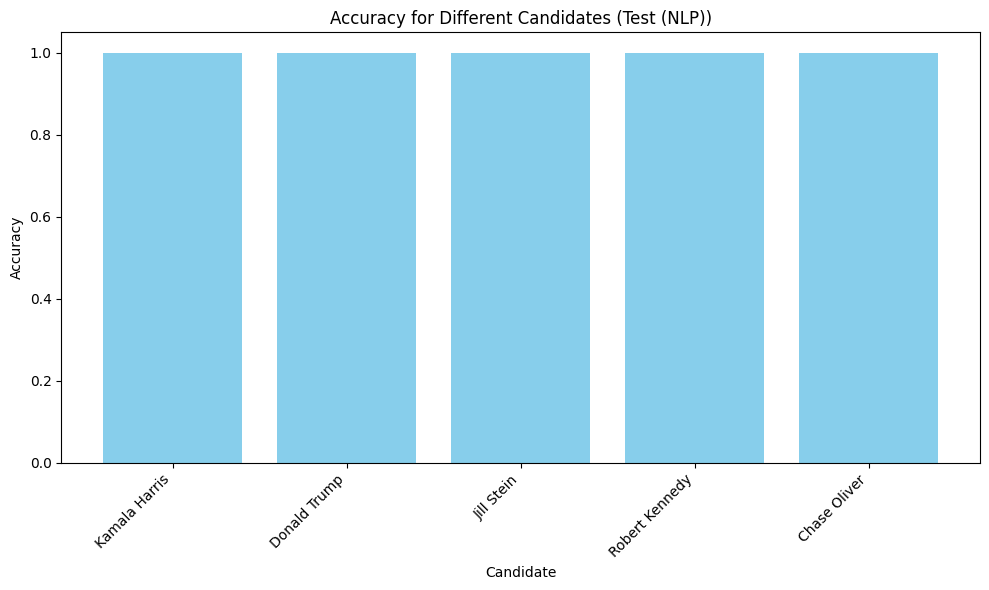

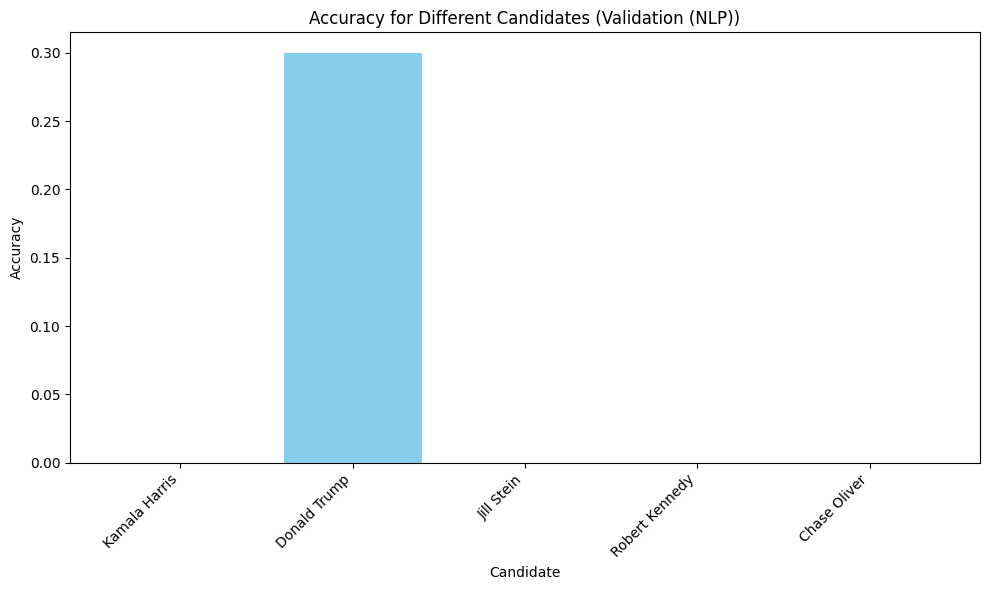

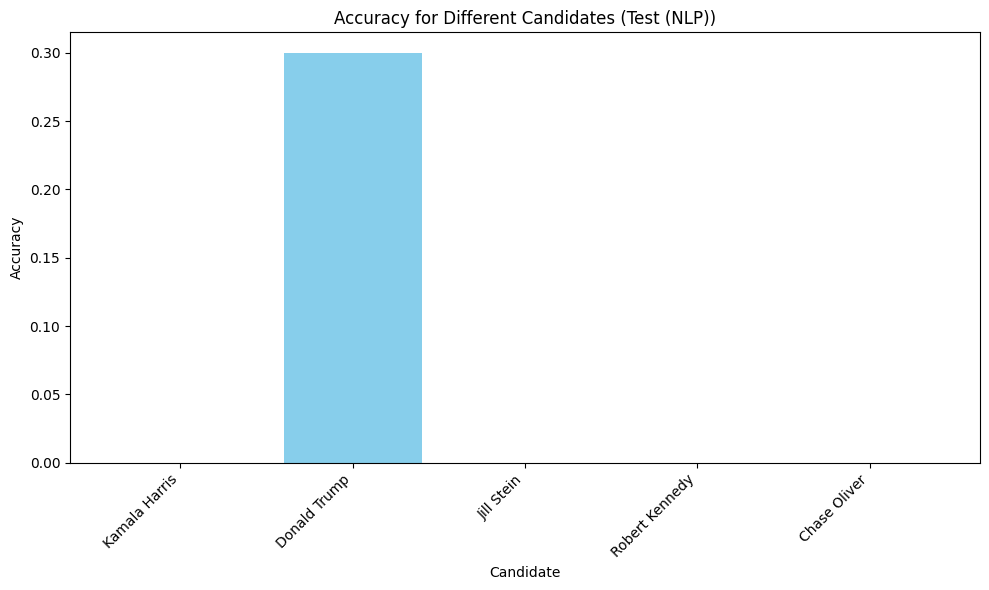

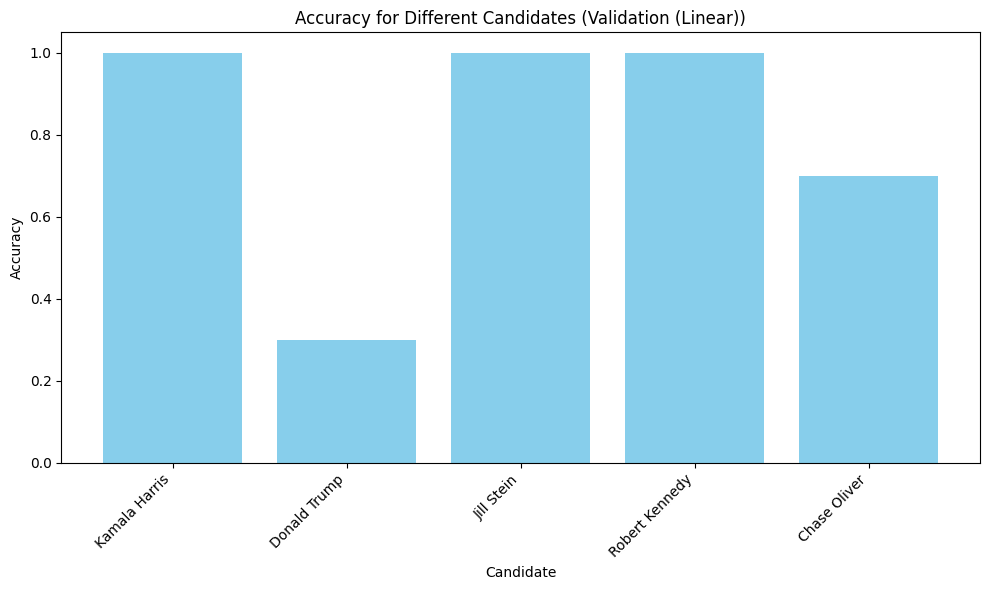

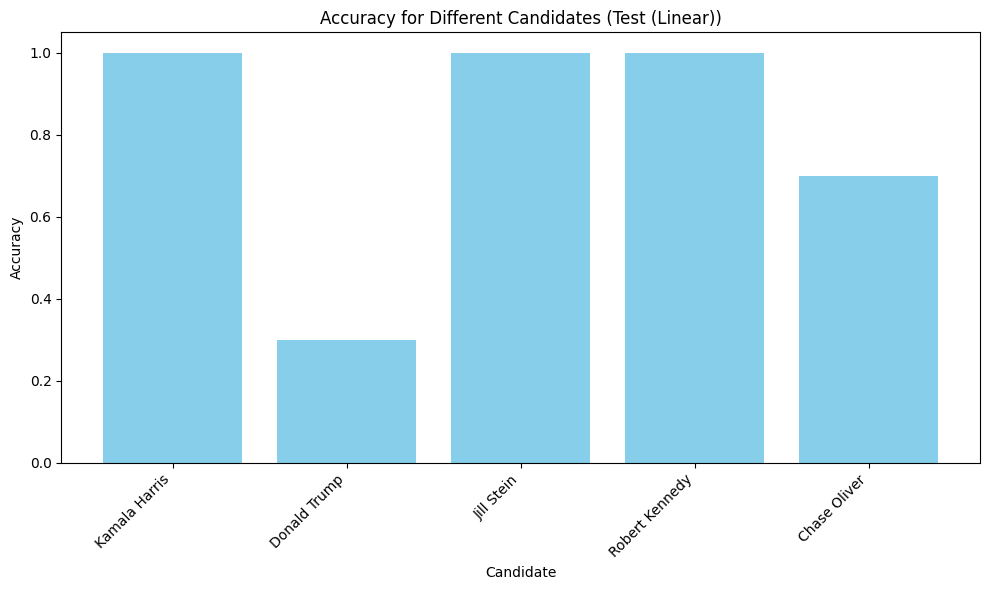

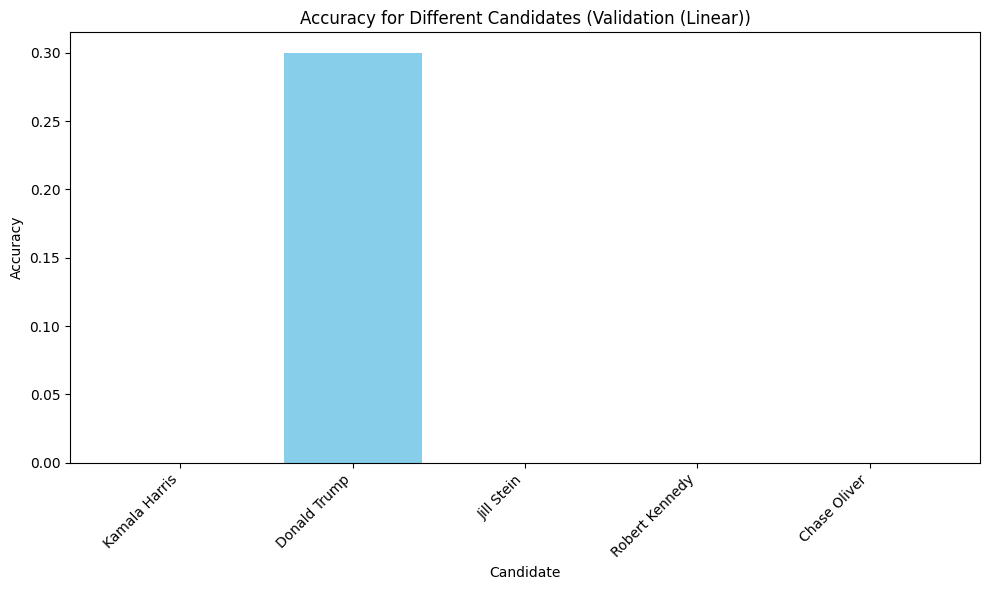

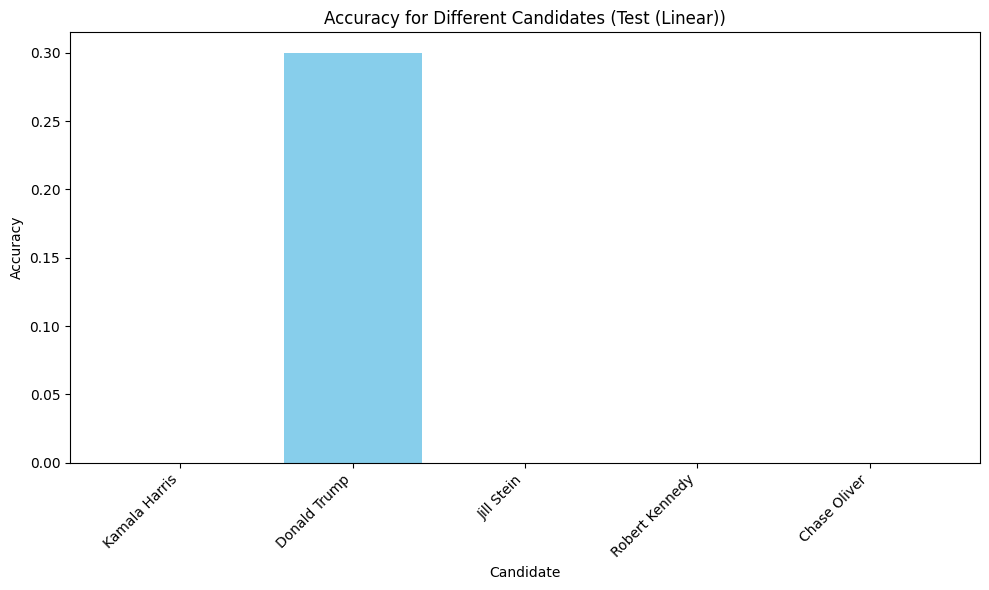

{'Kamala Harris': 0.0,
 'Donald Trump': 0.3,
 'Jill Stein': 0.0,
 'Robert Kennedy': 0.0,
 'Chase Oliver': 0.0}

In [12]:
import nltk
nltk.download('punkt_tab')
nltk.download('stopwords')

import pandas as pd
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,accuracy_score
import matplotlib.pyplot as plt

def clean_text(text):
    text = text.lower()
    text = re.sub(r'http\S+|www.\S+', '', text)
    text = re.sub(r'@\w+', '', text)
    text = re.sub(r'#\w+', '', text)
    text = re.sub(r'[^\w\s]', '', text)
    text = re.sub(r'\d+', '', text)
    tokens = word_tokenize(text)
    tokens = [word for word in tokens if word not in stopwords.words('english')]
    return " ".join(tokens)

def make_X(data_frame, vector):
    data_frame['clean_tweet'] = data_frame['tweet_text'].apply(clean_text)
    X_text = vector.transform(data_frame['clean_tweet']).toarray()
    X_numerical = data_frame[['likes', 'retweets']].values
    X = np.hstack((X_numerical, X_text))
    return X

def make_xlinear(data_frame):
    X_numerical = data_frame[['likes', 'retweets']].values
    return X_numerical

def make_Y(data_frame):
    data_frame['sentiment'] = data_frame['sentiment'].map({'negative': -1, 'neutral': 0, 'positive': 1})
    data_frame.dropna(inplace=True)
    y = data_frame['sentiment'].values
    return y

def performNLP(file_path):
    df = pd.read_csv(file_path)

    df['sentiment'] = df['sentiment'].map({'negative': -1, 'neutral': 0, 'positive': 1})
    df.dropna(inplace=True)

    y = df['sentiment'].values
    df['clean_tweet'] = df['tweet_text'].apply(clean_text)

    vectorizer = TfidfVectorizer(max_features=5000)
    X_text = vectorizer.fit_transform(df['clean_tweet']).toarray()
    X_numerical = df[['likes', 'retweets']].values
    X = np.hstack((X_numerical, X_text))

    model = LinearRegression()
    model.fit(X, y)
    return model,vectorizer

def performLinear(file_path):
    df = pd.read_csv(file_path)
    df['sentiment'] = df['sentiment'].map({'negative': -1, 'neutral': 0, 'positive': 1})
    df.dropna(inplace=True)

    y = df['sentiment'].values
    X = df[['likes', 'retweets']].values

    model = LinearRegression()
    model.fit(X,y)
    return model

model_notprocessed,vectorizer_np = performNLP('train.csv')
model_processed,vectorizer_p = performNLP('train_preprocessed.csv')

y_np_valid_pred = model_notprocessed.predict(make_X(pd.read_csv('val.csv'),vectorizer_np))
y_p_valid_pred = model_processed.predict(make_X(pd.read_csv('val_preprocessed.csv'),vectorizer_p))

y_np_test_pred = model_notprocessed.predict(make_X(pd.read_csv('test.csv'),vectorizer_np))
y_p_test_pred = model_processed.predict(make_X(pd.read_csv('test_preprocessed.csv'),vectorizer_p))

mse_np_valid = mean_squared_error(y_np_valid_pred,make_Y(pd.read_csv('val.csv')))
mse_p_valid = mean_squared_error(y_p_valid_pred,make_Y(pd.read_csv('val_preprocessed.csv')))

mse_np_test = mean_squared_error(y_np_test_pred,make_Y(pd.read_csv('test.csv')))
mse_p_test = mean_squared_error(y_p_test_pred,make_Y(pd.read_csv('test_preprocessed.csv')))

r2_np_valid = model_notprocessed.score(make_X(pd.read_csv('val.csv'),vectorizer_np),make_Y(pd.read_csv('val.csv')))
r2_p_valid = model_processed.score(make_X(pd.read_csv('val_preprocessed.csv'),vectorizer_p),make_Y(pd.read_csv('val_preprocessed.csv')))

r2_np_test = model_notprocessed.score(make_X(pd.read_csv('test.csv'),vectorizer_np),make_Y(pd.read_csv('test.csv')))
r2_p_test = model_processed.score(make_X(pd.read_csv('test_preprocessed.csv'),vectorizer_p),make_Y(pd.read_csv('test_preprocessed.csv')))

print(f"R Square Error for unprocessed Validation without NLP = {r2_np_valid}")
print(f"R Square Error for processed Validation without NLP = {r2_p_valid}")
print()
print(f"R Square Error for unprocessed Testing without NLP = {r2_np_test}")
print(f"R Square Error for processed Testing without NLP = {r2_p_test}")
print()
print(f"The Mean Squared Error for Unprocessed Validation data NLP = {mse_np_valid}")
print(f"The Mean Squared Error for Processed Validation data NLP = {mse_p_valid}")
print()
print(f"The Mean Squared Error for Unprocessed Testing data NLP = {mse_np_test}")
print(f"The Mean Squared Error for Processed Testing data NLP = {mse_p_test}")
print()

model_np = performLinear('train.csv')
model_p = performLinear('train_preprocessed.csv')

y_np_validlinear_pred = model_np.predict(make_xlinear(pd.read_csv("val.csv")))
y_p_validlinear_pred = model_p.predict(make_xlinear(pd.read_csv("val_preprocessed.csv")))

y_np_testlinear_pred = model_np.predict(make_xlinear(pd.read_csv("test.csv")))
y_p_testlinear_pred = model_p.predict(make_xlinear(pd.read_csv("test_preprocessed.csv")))

mse_np_valid_linear = mean_squared_error(y_np_validlinear_pred,make_Y(pd.read_csv('val.csv')))
mse_p_valid_linear = mean_squared_error(y_p_validlinear_pred,make_Y(pd.read_csv('val_preprocessed.csv')))

mse_np_test_linear = mean_squared_error(y_np_testlinear_pred,make_Y(pd.read_csv('test.csv')))
mse_p_test_linear = mean_squared_error(y_p_testlinear_pred,make_Y(pd.read_csv('test_preprocessed.csv')))

r2_np_valid_linear = model_np.score(make_xlinear(pd.read_csv('val.csv')),make_Y(pd.read_csv('val.csv')))
r2_p_valid_linear = model_p.score(make_xlinear(pd.read_csv('val_preprocessed.csv')),make_Y(pd.read_csv('val_preprocessed.csv')))

r2_np_test_linear = model_np.score(make_xlinear(pd.read_csv('test.csv')),make_Y(pd.read_csv('test.csv')))
r2_p_test_linear = model_p.score(make_xlinear(pd.read_csv('test_preprocessed.csv')),make_Y(pd.read_csv('test_preprocessed.csv')))

print(f"R Square Error for unprocessed Validation without NLP = {r2_np_valid_linear}")
print(f"R Square Error for processed Validation without NLP = {r2_p_valid_linear}")
print()
print(f"R Square Error for unprocessed Testing without NLP = {r2_np_test_linear}")
print(f"R Square Error for processed Testing without NLP = {r2_p_test_linear}")
print()
print(f"The Mean Squared Error for Unprocessed Validation data NLP = {mse_np_valid_linear}")
print(f"The Mean Squared Error for Processed Validation data NLP = {mse_p_valid_linear}")
print()
print(f"The Mean Squared Error for Unprocessed Testing data NLP = {mse_np_test_linear}")
print(f"The Mean Squared Error for Processed Testing data NLP = {mse_p_test_linear}")
print()

data = {
    "Model" : ["Unprocessed MSE" , "Processed MSE" , "Unprocessed R Square" , "Processed R Square"],
    "NLP Valid" : [mse_np_valid , mse_p_valid , r2_np_valid , r2_p_valid],
    "NLP Test" : [mse_np_test , mse_p_test , r2_np_test , r2_p_test],
    "Linear Valid" : [mse_np_valid_linear , mse_p_valid_linear , r2_np_valid_linear , r2_p_valid_linear],
    "Linear Test" : [mse_np_test_linear , mse_p_test_linear , r2_np_test_linear , r2_p_test_linear]
}

datadf = pd.DataFrame(data)
datadf.to_csv("LinearRegressionErrors.csv",index = False)

y_val = make_Y(pd.read_csv("val.csv"))
y_test = make_Y(pd.read_csv("test.csv"))

plt.scatter(y_val,y_np_valid_pred,alpha=0.6,color="red")
plt.title("Actual v/s Predicted for Validation data with NLP and no Preprocessing")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.show()

plt.scatter(y_val,y_p_valid_pred,alpha=0.6,color="red")
plt.title("Actual v/s Predicted for Validation data with NLP and Preprocessing")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.show()

plt.scatter(y_test,y_np_test_pred,alpha=0.6,color="red")
plt.title("Actual v/s Predicted for Testing data with NLP and no Preprocessing")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.show()

plt.scatter(y_test,y_p_test_pred,alpha=0.6,color="red")
plt.title("Actual v/s Predicted for Testing data with NLP and Preprocessing")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.show()

plt.scatter(y_val,y_np_validlinear_pred,alpha=0.6,color="red")
plt.title("Actual v/s Predicted for Validation data with no NLP and no Preprocessing")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.show()

plt.scatter(y_val,y_p_validlinear_pred,alpha=0.6,color="red")
plt.title("Actual v/s Predicted for Validation data with no NLP and Preprocessing")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.show()

plt.scatter(y_test,y_np_testlinear_pred,alpha=0.6,color="red")
plt.title("Actual v/s Predicted for Testing data with no NLP and no Preprocessing")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.show()


plt.scatter(y_test,y_p_testlinear_pred,alpha=0.6,color="red")
plt.title("Actual v/s Predicted for Testing data with no NLP and Preprocessing")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.show()

def clean_text(text):
    text = text.lower()
    text = re.sub(r'http\S+|www.\S+', '', text)
    text = re.sub(r'@\w+', '', text)
    text = re.sub(r'#\w+', '', text)
    text = re.sub(r'[^\w\s]', '', text)
    text = re.sub(r'\d+', '', text)
    tokens = word_tokenize(text)
    tokens = [word for word in tokens if word not in stopwords.words('english')]
    return " ".join(tokens)


def make_X(data_frame, vector):
    data_frame['clean_tweet'] = data_frame['tweet_text'].apply(clean_text)
    X_text = vector.transform(data_frame['clean_tweet']).toarray()
    X_numerical = data_frame[['likes', 'retweets']].values
    X = np.hstack((X_numerical, X_text))
    return X


def make_xlinear(data_frame):
    X_numerical = data_frame[['likes', 'retweets']].values
    return X_numerical


def make_Y(data_frame):
    data_frame['sentiment'] = data_frame['sentiment'].map({'negative': -1, 'neutral': 0, 'positive': 1})
    data_frame.dropna(inplace=True)
    y = data_frame['sentiment'].values
    return y, data_frame


def performNLP(file_path):
    df = pd.read_csv(file_path)
    df['sentiment'] = df['sentiment'].map({'negative': -1, 'neutral': 0, 'positive': 1})
    df.dropna(inplace=True)
    y = df['sentiment'].values
    df['clean_tweet'] = df['tweet_text'].apply(clean_text)
    vectorizer = TfidfVectorizer(max_features=5000)
    X_text = vectorizer.fit_transform(df['clean_tweet']).toarray()
    X_numerical = df[['likes', 'retweets']].values
    X = np.hstack((X_numerical, X_text))
    model = LinearRegression()
    model.fit(X, y)
    return model, vectorizer


def performLinear(file_path):
    df = pd.read_csv(file_path)
    df['sentiment'] = df['sentiment'].map({'negative': -1, 'neutral': 0, 'positive': 1})
    df.dropna(inplace=True)
    y = df['sentiment'].values
    X = df[['likes', 'retweets']].values
    model = LinearRegression()
    model.fit(X, y)
    return model


def calculate_and_plot_candidate_accuracy(df, model, vectorizer=None, dataset_name="Dataset"):
    candidates = df['candidate'].unique()
    candidate_accuracy = {}
    for candidate in candidates:
        candidate_data = df[df['candidate'] == candidate].copy()
        y_true_candidate, candidate_data_modified = make_Y(candidate_data)
        if vectorizer is not None:
            X_candidate = make_X(candidate_data_modified, vectorizer)
        else:
            X_candidate = make_xlinear(candidate_data_modified)
        y_pred_candidate = model.predict(X_candidate)
        y_pred_classes = np.round(y_pred_candidate).astype(int)
        y_pred_classes = np.clip(y_pred_classes, -1, 1)
        accuracy = accuracy_score(y_true_candidate, y_pred_classes)
        candidate_accuracy[candidate] = accuracy

    plt.figure(figsize=(10, 6))
    plt.bar(candidate_accuracy.keys(), candidate_accuracy.values(), color='skyblue')
    plt.title(f'Accuracy for Different Candidates ({dataset_name})')
    plt.xlabel('Candidate')
    plt.ylabel('Accuracy')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

    return candidate_accuracy

train_df = pd.read_csv('train.csv')
val_df = pd.read_csv('val.csv')
test_df = pd.read_csv('test.csv')

model_notprocessed, vectorizer_np = performNLP('train.csv')
model_processed, vectorizer_p = performNLP('train_preprocessed.csv')
model_np = performLinear('train.csv')
model_p = performLinear('train_preprocessed.csv')

calculate_and_plot_candidate_accuracy(val_df, model_notprocessed, vectorizer_np, "Validation (NLP)")
calculate_and_plot_candidate_accuracy(test_df, model_notprocessed, vectorizer_np, "Test (NLP)")

calculate_and_plot_candidate_accuracy(val_df, model_processed, vectorizer_p, "Validation (NLP)")
calculate_and_plot_candidate_accuracy(test_df, model_processed, vectorizer_p, "Test (NLP)")

calculate_and_plot_candidate_accuracy(val_df, model_np, dataset_name="Validation (Linear)")
calculate_and_plot_candidate_accuracy(test_df, model_np, dataset_name="Test (Linear)")

calculate_and_plot_candidate_accuracy(val_df, model_p, dataset_name="Validation (Linear)")
calculate_and_plot_candidate_accuracy(test_df, model_p, dataset_name="Test (Linear)")